I will print the outputs of only the first 5 entries for all arrays and lists else you guys have to scroll through a lot to reach the next cell and it also takes a lot of time to commit. If you want to print all the entries, you can fork this kernel and just run a loop until the length of the array or list and print all entries.

In [1]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# loading the data into the dataframe
df = pd.read_csv('preprocessed_dataset_kathmandu.csv') 
print(df) 

            date_and_time     PM2.5        O3  TEMPERATURE  PRESSURE  \
0     2019-01-01 00:00:00  0.098577  0.000000     0.060150  0.814545   
1     2019-01-01 01:00:00  0.114837  0.000000     0.112782  0.847273   
2     2019-01-01 02:00:00  0.137195  0.008475     0.150376  0.880000   
3     2019-01-01 03:00:00  0.178862  0.033898     0.285714  0.909091   
4     2019-01-01 04:00:00  0.197154  0.161017     0.394737  0.916364   
...                   ...       ...       ...          ...       ...   
7632  2019-12-31 19:00:00  0.172764  0.042373     0.199248  0.847273   
7633  2019-12-31 20:00:00  0.162602  0.033898     0.180451  0.850909   
7634  2019-12-31 21:00:00  0.121951  0.016949     0.157895  0.854545   
7635  2019-12-31 22:00:00  0.119919  0.025424     0.135338  0.865455   
7636  2019-12-31 23:00:00  0.138211  0.033898     0.116541  0.876364   

      DEWPOINT  RAIN  
0     0.243077   0.0  
1     0.243077   0.0  
2     0.264615   0.0  
3     0.332308   0.0  
4     0.252308   0.0

In [3]:
df['date_and_time'] = pd.to_datetime(df['date_and_time'], errors='coerce')

In [4]:
# viewing info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_and_time  7637 non-null   datetime64[ns]
 1   PM2.5          7637 non-null   float64       
 2   O3             7637 non-null   float64       
 3   TEMPERATURE    7637 non-null   float64       
 4   PRESSURE       7637 non-null   float64       
 5   DEWPOINT       7637 non-null   float64       
 6   RAIN           7637 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 417.8 KB


In [5]:
#viewing few rows from the top
df.head()

,date_and_time,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
0,2019-01-01 00:00:00,0.098577,0.000000,0.060150,0.814545,0.243077,0.0
1,2019-01-01 01:00:00,0.114837,0.000000,0.112782,0.847273,0.243077,0.0
2,2019-01-01 02:00:00,0.137195,0.008475,0.150376,0.880000,0.264615,0.0
3,2019-01-01 03:00:00,0.178862,0.033898,0.285714,0.909091,0.332308,0.0
4,2019-01-01 04:00:00,0.197154,0.161017,0.394737,0.916364,0.252308,0.0


In [6]:
#number of rows and columns in the dataset
print(df.shape)

(7637, 7)


In [7]:
#statistical information about columns
print(df.describe())

                       date_and_time        PM2.5           O3  TEMPERATURE  \
count                           7637  7637.000000  7637.000000  7637.000000   
mean   2019-06-30 06:07:55.631792384     0.045832     0.245428     0.561692   
min              2019-01-01 00:00:00     0.000000     0.000000     0.000000   
25%              2019-04-02 10:00:00     0.018293     0.101695     0.413534   
50%              2019-06-26 16:00:00     0.036585     0.211864     0.601504   
75%              2019-09-27 04:00:00     0.060976     0.355932     0.714286   
max              2019-12-31 23:00:00     1.000000     1.000000     1.000000   
std                              NaN     0.045836     0.179375     0.209576   

          PRESSURE     DEWPOINT         RAIN  
count  7637.000000  7637.000000  7637.000000  
mean      0.524710     0.673810     0.012659  
min       0.000000     0.000000     0.000000  
25%       0.356364     0.504615     0.000000  
50%       0.552727     0.701538     0.000000  
75%   

In [8]:
#checking how many null values are in each column
df.isnull().sum()

date_and_time    0
PM2.5            0
O3               0
TEMPERATURE      0
PRESSURE         0
DEWPOINT         0
RAIN             0
dtype: int64

Just doing `df.dropna()` drops all the NaN values only for the current execution of the cell. If you do the above `df.isnull().sum()` now, you can see that null values still persists. You can solve this by assigning the obtained output of 
`df.dopna()` to the variable `df` which stores our data (dataframe)

In [9]:
print(df.columns)

Index(['date_and_time', 'PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT',
       'RAIN'],
      dtype='object')


In [10]:
# dropping all the rows with NaN values
df = df.dropna()

In [11]:
import numpy as np

mean_pm = df['PM2.5'].mean()
std_pm = df['PM2.5'].std()
z_scores = (df['PM2.5'] - mean_pm) / std_pm

threshold = 3
df = df[np.abs(z_scores) < threshold]

In [12]:
#defining training and testing data
x_train = df[:7637]
y_train = x_train['PM2.5']
x_test = df[6110:7637]
y_test = x_test['PM2.5']
print(y_test)

6173    0.026423
6174    0.026423
6175    0.034553
6176    0.038618
6177    0.051829
          ...   
7632    0.172764
7633    0.162602
7634    0.121951
7635    0.119919
7636    0.138211
Name: PM2.5, Length: 1456, dtype: float64


There are many pollutants. Let's first try to predict PM2.5 concentration values. Let the years 2016 and 2017 be the testing set. As you can see below, these 2 years account for 21.9% of the data (test set)

In [13]:
df.loc[6110:7637].count() / df.shape[0] * 100

date_and_time    20.076659
PM2.5            20.076659
O3               20.076659
TEMPERATURE      20.076659
PRESSURE         20.076659
DEWPOINT         20.076659
RAIN             20.076659
dtype: float64

In [14]:
#Normalizing training data
train_norm = x_train['PM2.5']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.53888889]
[0.62777778]
[0.75]
[0.97777778]
[0.7]


Even after normalization and scaing, null values are possible (many people disregard this). Let's check if any null values are present.

In [15]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  21


In [16]:
#removing null values 
train_norm = train_norm[train_norm!=0]

In [17]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['PM2.5']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.0994152]
[0.0994152]
[0.14619883]
[0.16959064]
[0.24561404]


In [18]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1 
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  2


In [19]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [20]:
print(train_norm.shape)
print(test_norm.shape)

(7545,)
(1454,)


Since this is a time series data, we should be predicting the values after looking at a set of values rather than just a single value like we usually do. This takes into account the correlation between the data points and the timestamps. Because the neighbours should be considered for how the values change over time. Let's define a function to do this.

The below function called split_sequence splits the sequence into sets of n values. This n is given as n_steps (step_size). For example, if n=3, we split the sequence in groups of 3. We create 2 empty lists and append the split sequences.

In [21]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

Here the number of features = 1 as we will be predicting a single value. Let's reshape the split sequences into the format of number of rows, number of columns. (shape[0], shape[1]). In the output, we can see that groups of 3 since n_steps = 3 have been obtained.

In [22]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

[[[0.53888889]
  [0.62777778]
  [0.75      ]]

 [[0.62777778]
  [0.75      ]
  [0.97777778]]

 [[0.75      ]
  [0.97777778]
  [0.7       ]]

 ...

 [[0.9       ]
  [0.94444444]
  [0.88888889]]

 [[0.94444444]
  [0.88888889]
  [0.66666667]]

 [[0.88888889]
  [0.66666667]
  [0.65555556]]]
[[[0.53888889]
  [0.62777778]
  [0.75      ]]

 [[0.62777778]
  [0.75      ]
  [0.97777778]]

 [[0.75      ]
  [0.97777778]
  [0.7       ]]

 ...

 [[0.9       ]
  [0.94444444]
  [0.88888889]]

 [[0.94444444]
  [0.88888889]
  [0.66666667]]

 [[0.88888889]
  [0.66666667]
  [0.65555556]]]
[[[0.53888889]
  [0.62777778]
  [0.75      ]]

 [[0.62777778]
  [0.75      ]
  [0.97777778]]

 [[0.75      ]
  [0.97777778]
  [0.7       ]]

 ...

 [[0.9       ]
  [0.94444444]
  [0.88888889]]

 [[0.94444444]
  [0.88888889]
  [0.66666667]]

 [[0.88888889]
  [0.66666667]
  [0.65555556]]]
[[[0.53888889]
  [0.62777778]
  [0.75      ]]

 [[0.62777778]
  [0.75      ]
  [0.97777778]]

 [[0.75      ]
  [0.97777778]
  [0.7      

You can see below that, we predict the value for the first 3 values, then consider that output as one of the 3 values in the next set. For example, we preedict 0.1 first, then we take that 0.1 as input in the second set and so on.

In [23]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.0994152  0.0994152  0.14619883] 0.169590643274854
[0.0994152  0.14619883 0.16959064] 0.24561403508771928
[0.14619883 0.16959064 0.24561404] 0.2865497076023392
[0.16959064 0.24561404 0.28654971] 0.2222222222222222
[0.24561404 0.28654971 0.22222222] 0.2514619883040934


Let's define our neural network (LSTM: Long Short Term Memory). Let's add 50 nodes in our first layer with a ReLU (Rectified linear unit) activation. Their shape will be step size, number of features. Then we will add, a dense layer with one node for the output.

We can try out different optimizers to see which minimizes loss and maximizes accuracy. Stochastic gradient descent (SGD), Adam, AdaBoost, RMSProp are few of them. lr = learning rate, decay = by how much to decay the learning rate, momentum = how much should the gradient descent be accelerated to dampen oscillations, nesterov = whether to use nesterov momentum. Nesterov has stronger convergence for convex functions. And then we compile using MSE (mean squared loss) as our loss function.

In [24]:
# define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))

sgd = SGD(learning_rate=0.01, decay=1e-5, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [25]:
# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, batch_size=8)

Epoch 1/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0220 - val_accuracy: 6.8918e-04 - val_loss: 0.0098
Epoch 2/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 8.6493e-05 - loss: 0.0081 - val_accuracy: 6.8918e-04 - val_loss: 0.0093
Epoch 3/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 4.3410e-05 - loss: 0.0074 - val_accuracy: 6.8918e-04 - val_loss: 0.0089
Epoch 4/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 2.4072e-05 - loss: 0.0074 - val_accuracy: 6.8918e-04 - val_loss: 0.0082
Epoch 5/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 9.0320e-05 - loss: 0.0065 - val_accuracy: 6.8918e-04 - val_loss: 0.0079
Epoch 6/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 2.3736e-05 - loss: 0.0065 - val_accuracy: 6.8918e-04 - val_loss: 0.0079
Epoch 7/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 9.8027e-05 - loss: 0.0065 - val_accuracy: 6.8918e-04 - val_loss: 0.0079
Epoch 8/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

In [26]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [27]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[0.14967096]
[0.17013453]
[0.26176113]
[0.30836838]
[0.22564745]


In [28]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)

MSE: 0.00743


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_split_test, yhat))
mae = mean_absolute_error(y_split_test, yhat)
r2 = r2_score(y_split_test, yhat)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 0.08619432225123483
MAE: 0.0598595868164696
R²: 0.7000975262613565


Below, I have plotted the actual true values (first plot) and preedicted values (second plot). One can visually see that the distribution is almost the same. This says that our predictions are very accurate.

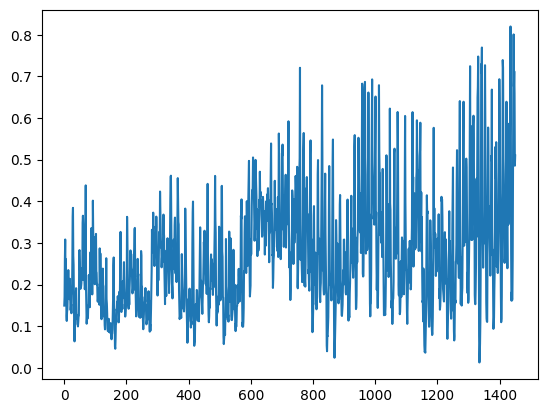

In [30]:
plt.plot(yhat)

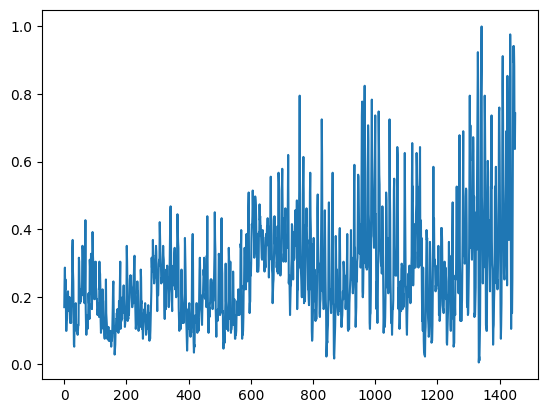

In [31]:
plt.plot(y_split_test)

In [32]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00013, Test: 0.00069


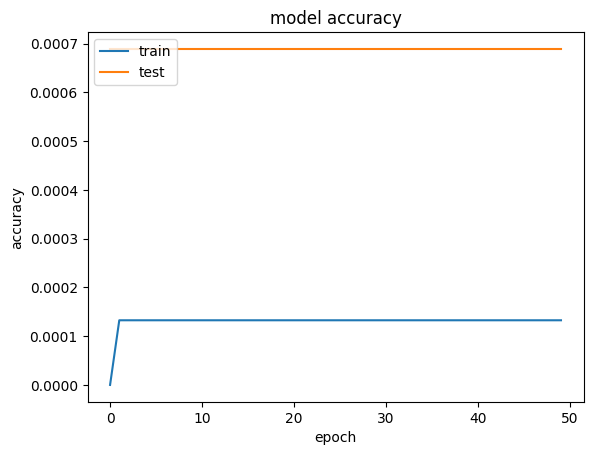

In [33]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

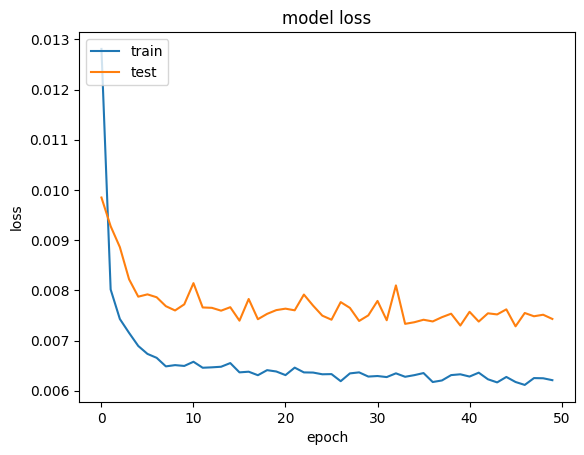

In [34]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Until now, we just ran our model for prediction of a single pollutant. We have 6 pollutants in our dataset and can make predictions for all of them. So, I have made a function which can be used to predict the other pollutants rather than having to write the code again and again. I have commented the function calls. You can fork this kernel to uncomment and predit the other pollutants (Coz it would take up a lot of space and time).

In [35]:
def compute(var):
    train_norm = x_train[var] 
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]
    
    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, batch_size=8)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)
    
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 7.8919e-05 - loss: 0.0049 - val_accuracy: 6.9444e-04 - val_loss: 0.0056
Epoch 2/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 6.0748e-05 - loss: 0.0044 - val_accuracy: 6.9444e-04 - val_loss: 0.0055
Epoch 3/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 3.6710e-04 - loss: 0.0044 - val_accuracy: 6.9444e-04 - val_loss: 0.0057
Epoch 4/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.1300e-04 - loss: 0.0040 - val_accuracy: 6.9444e-04 - val_loss: 0.0055
Epoch 5/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 4.0243e-04 - loss: 0.0041 - val_accuracy: 6.9444e-04 - val_loss: 0.0055
Epoch 6/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 2.4609e-05 - loss: 0.0042 - val_accuracy: 6.9444e-04 - val_loss: 0.0054
Epoch 7/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 2.2889e-05 - loss: 0.0040 - val_accuracy: 6.9444e-04 - val_loss: 0.0054
Epoch 8/10
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

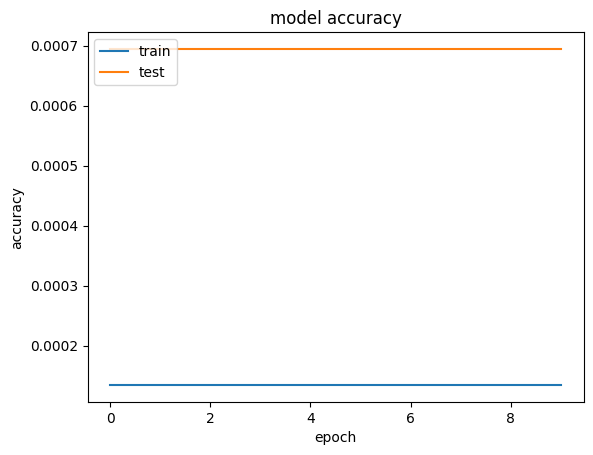

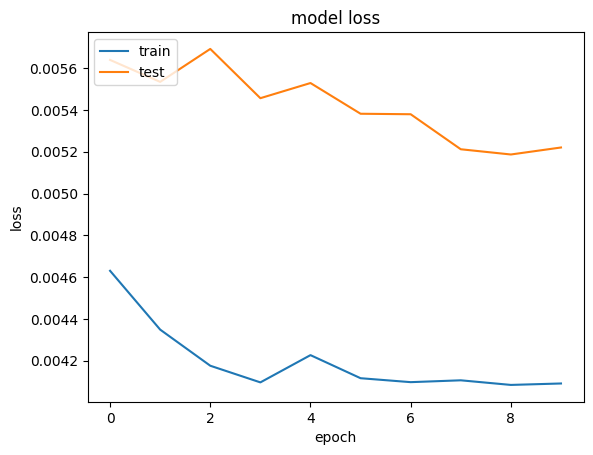

In [36]:
compute('O3')

Below, we will do a lot of visualizations to understand our data using various scatterplots, jointplots, pairplots, heatmap and correlation.

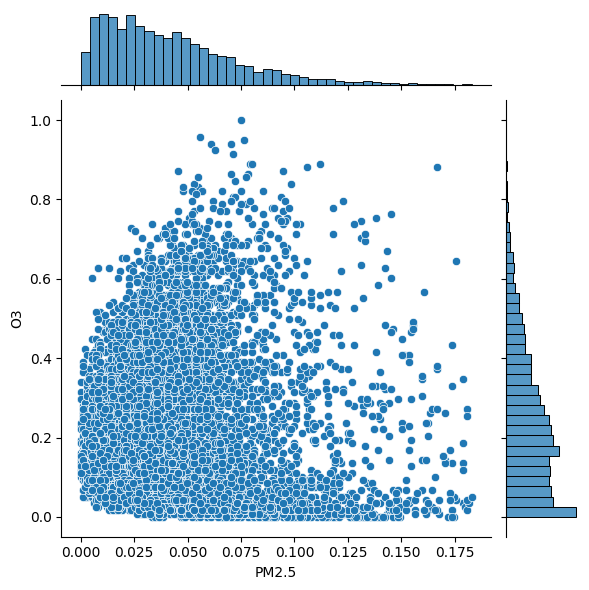

In [37]:
sns.jointplot(x=df['PM2.5'], y=df['O3'], data = df)

The above plot gives us the idea that these two conentrations are positively correlated with very few outliers.

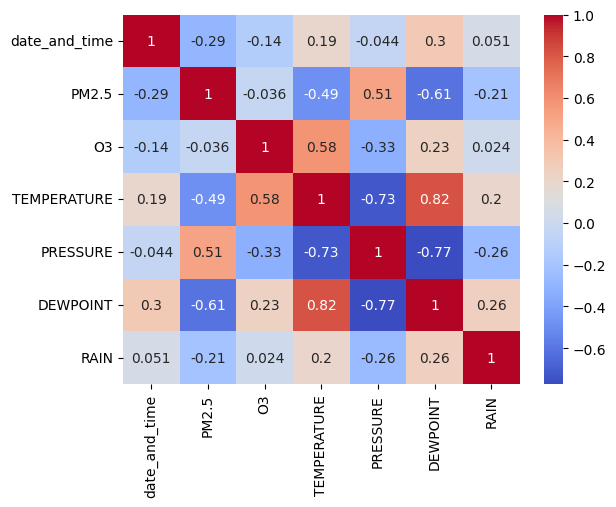

In [38]:
#correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

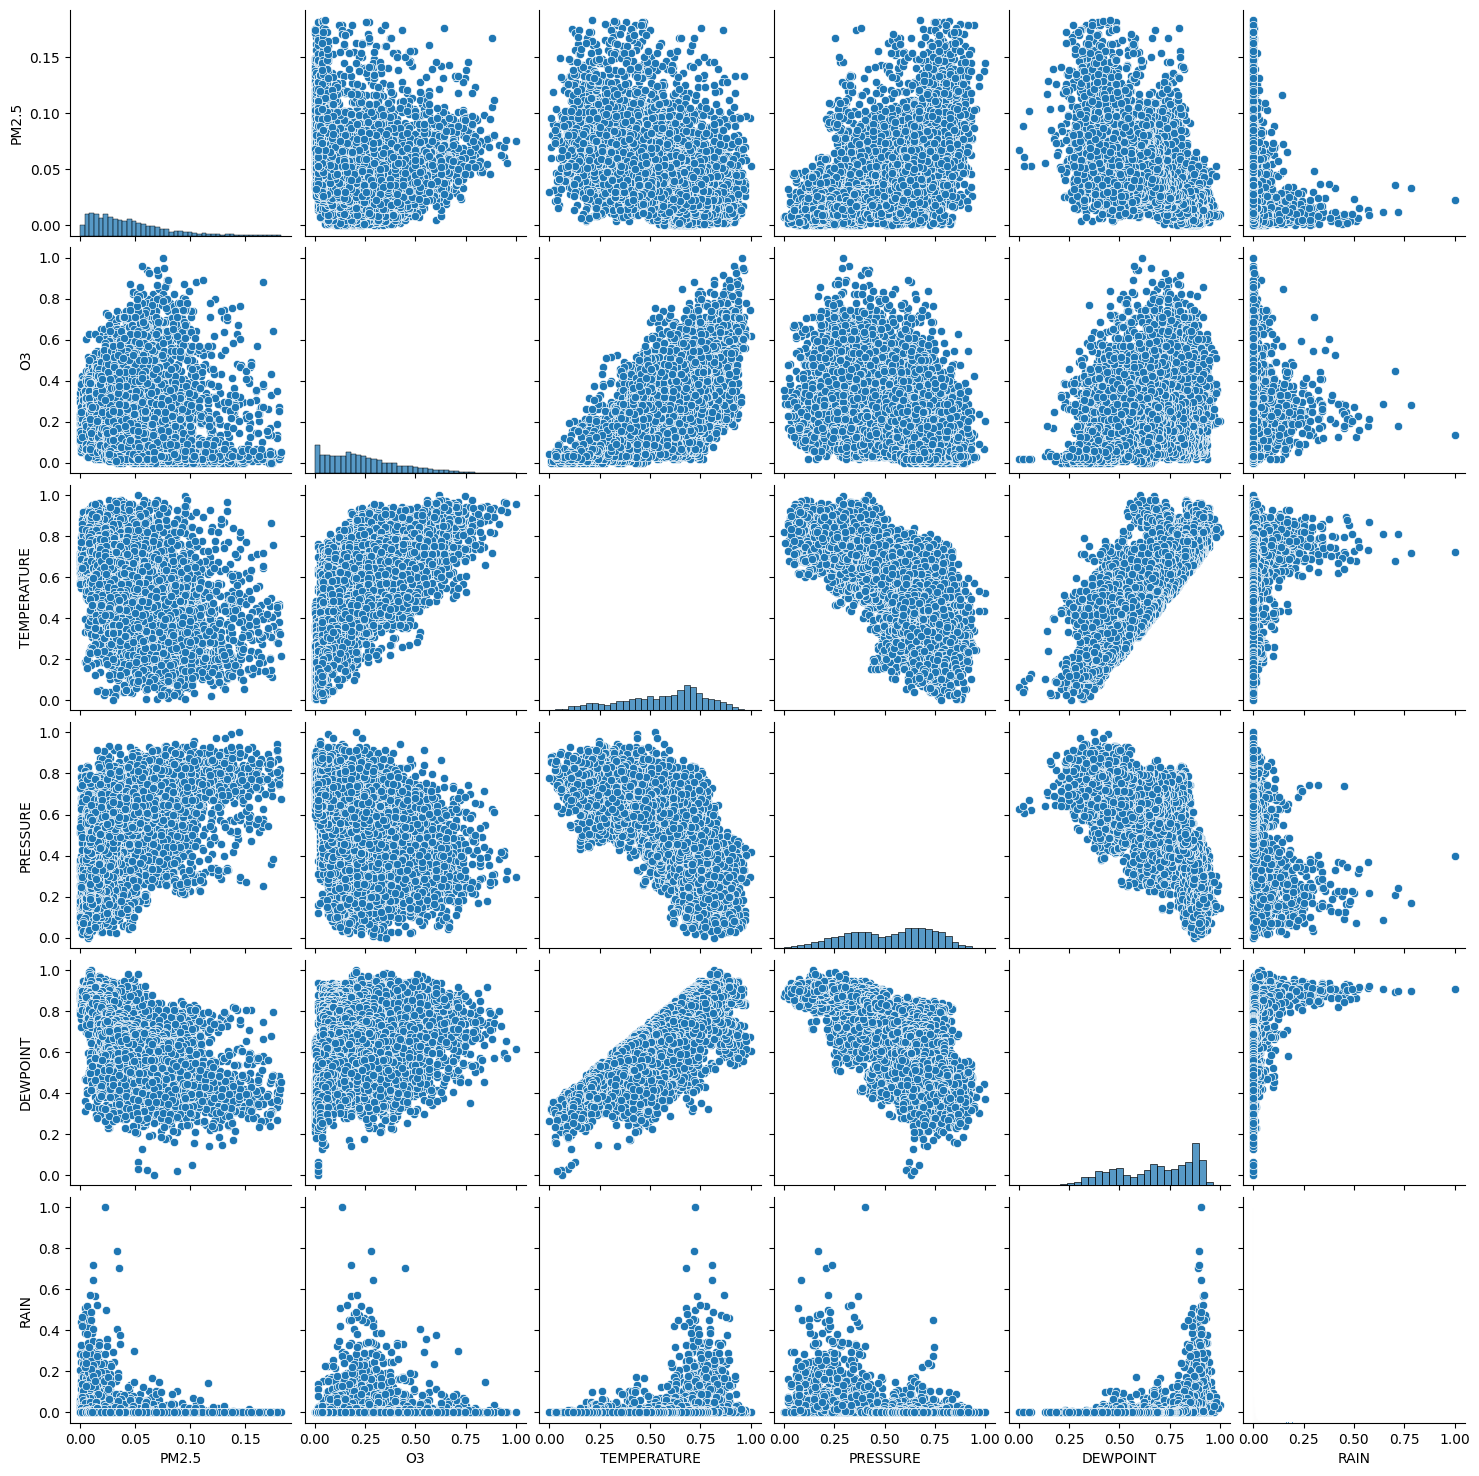

In [39]:
g = sns.pairplot(df)

In [40]:
# df.plot(kind='PRESSURE', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
# plt.show()

<Axes: xlabel='PM2.5', ylabel='O3'>

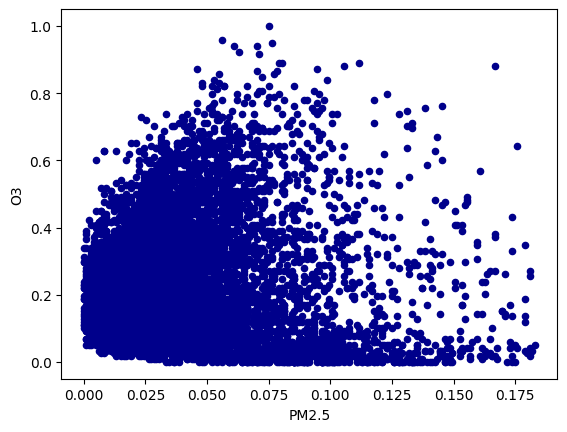

In [41]:
df.plot.scatter(x='PM2.5', y='O3', c='DarkBlue')

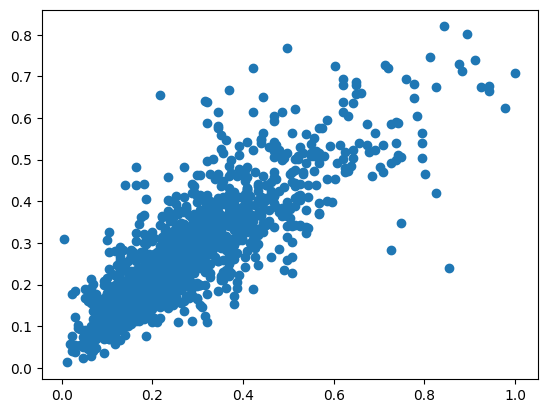

In [42]:
plt.scatter(y_split_test, yhat)

Heatmap is a very useful visualization tool to know how much each feature is correlated. vmax = max value of the heatmap fmt = number of decimal places upto which the value is shown square = do you want the heatmap to be square shaped linewidth = width of the lines in the heatmap annot = should the boxes be labelled with the value.

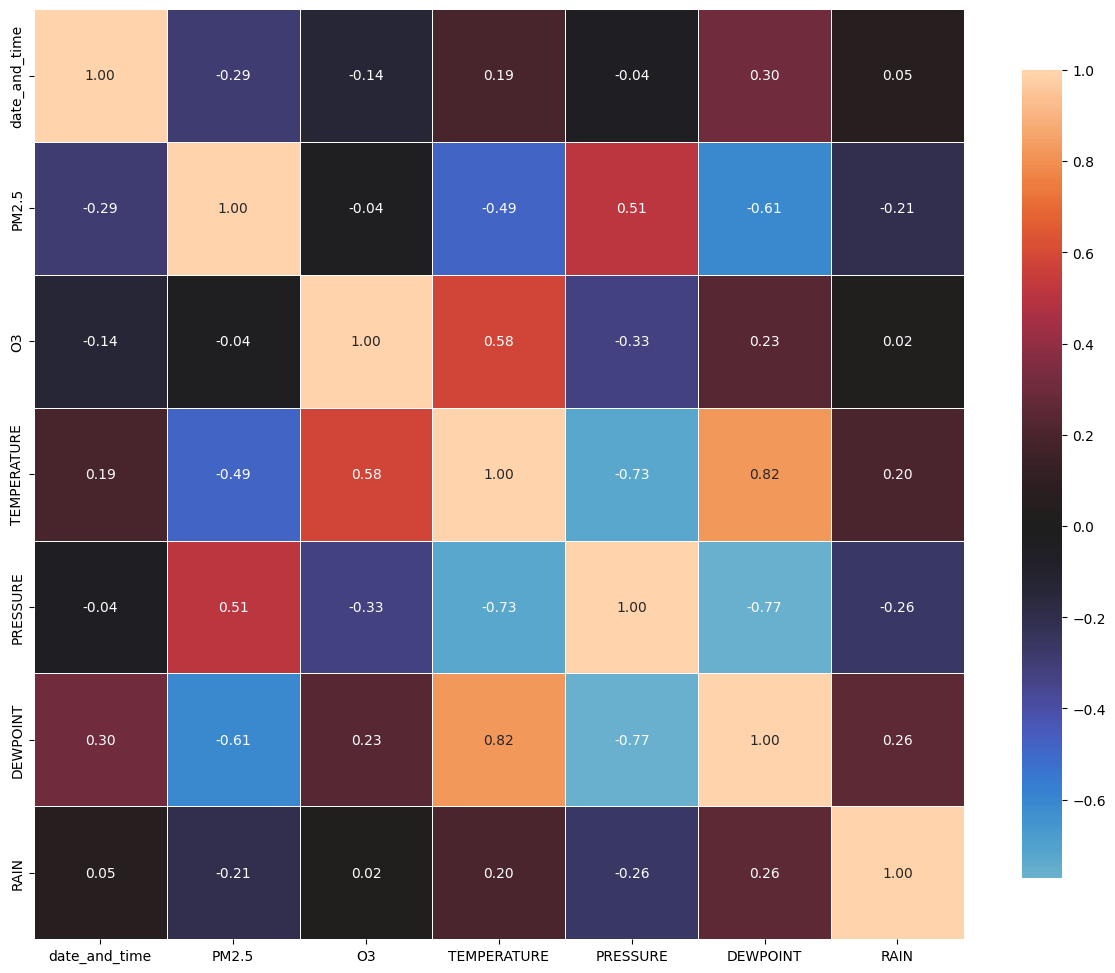

In [43]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();